## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1]:
# Reguired Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning 
1) check missing values
2) handle duplicates if exists 
3) check data types
4) understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
## checking all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [7]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [8]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Ummarried','Unmarried')

In [12]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [14]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
## checking the missing values
## these are features with nan values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), ' % missing values')

Age 4.62357  % missing values
TypeofContact 0.51146  % missing values
DurationOfPitch 5.13502  % missing values
NumberOfFollowups 0.92062  % missing values
PreferredPropertyStar 0.53191  % missing values
NumberOfTrips 2.86416  % missing values
NumberOfChildrenVisiting 1.35025  % missing values
MonthlyIncome 4.76678  % missing values


In [16]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values
1) Impute median value for age column
2) Impute mode for the type of contract
3) Impute Median for DurationOfPitch
4) Impute mode for the NumberOfFollowups as it is a descrete feature 
5) Impute mode for PreferredPropertyStar	
6) Impute median for NumberOfTrips
7) Impute mode for NumberOfChildrenVisiting
8) Impute median for MonthlyIncome

In [17]:
## Age 
df.Age.fillna(df.Age.median(),inplace=True)
## typeofcontract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
## DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
## NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
## Preferred Property star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
## Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
## number of children visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
## monthlyincome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [18]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [19]:
df.drop('CustomerID',inplace=True,axis=1)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [21]:
## creating new column for feature
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [22]:
## getting all the numeric features 
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numeric feature ',len(num_features))

Number of numeric feature  12


In [23]:
## getting all the catagorical features 
catagorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of catagorical feature ',len(catagorical_features))

Number of catagorical feature  6


In [24]:
## getting all the descrete features 
descrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of descrete feature ',len(descrete_features))

Number of descrete feature  9


In [25]:
## getting all the continious features 
continious_features = [feature for feature in num_features if feature not in descrete_features]
print('Number of descrete feature ',len(continious_features))

Number of descrete feature  3


In [26]:
## Train Test Split 
## and model Training

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [28]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [29]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [30]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [31]:
## train test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [34]:
## create column transformer with 3 types of transformers 
catagorical_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
OhTransformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OhTransformer,catagorical_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [35]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [36]:
## applying transformation on training dataset
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [37]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.72207,1.502261,0.289357,-0.725693,-0.125705,-0.63557,-0.775296,-1.267544,-0.424676,-0.068814
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.72207,-0.997195,0.289357,-0.725693,-0.125705,1.57339,-0.045715,0.788928,-0.429855,0.639241
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.72207,-0.283065,-0.706582,-0.725693,0.429669,1.57339,0.683865,0.788928,-1.010164,-0.776869
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.72207,1.026174,0.289357,-0.725693,-0.681079,1.57339,-0.045715,-1.267544,-1.192410,-1.484924
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.72207,2.335414,1.285296,-0.725693,0.985043,-0.63557,-0.045715,-1.267544,2.862270,0.639241


In [38]:
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -1.26754356,
        -0.43484293, -0.06881353],
       [ 0.        ,  0.        ,  0.        , ..., -1.26754356,
        -0.67866853, -0.77686853],
       [ 1.        ,  0.        ,  0.        , ..., -1.26754356,
         0.59206381, -1.48492354],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.78892752,
        -0.13365788,  0.63924147],
       [ 1.        ,  0.        ,  0.        , ...,  0.78892752,
        -0.1286701 ,  0.63924147],
       [ 1.        ,  0.        ,  0.        , ...,  0.78892752,
        -0.6458643 , -0.77686853]], shape=(978, 27))

In [39]:
## machine learning training 
## Random forest classifier training

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [41]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost Classifier" : AdaBoostClassifier(),
    "GradientBoost" : GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) ## training the data

    ## making predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## training set performance metrics
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    ## test set performance metrics 
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    ## displaying the results 
    print(list(models.keys())[i])

    print('model performance on training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))



    print('-'*35)
    print('Model performance on test set')
    print('model performance on training set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
model performance on training set
- Accuracy: 0.8455
- F1 Score: 0.8194
- Precision: 0.6828
- recall: 0.2943
- ROC AUC Score: 0.6318
-----------------------------------
Model performance on test set
model performance on training set
- Accuracy: 0.8425
- F1 Score: 0.8158
- Precision: 0.7882
- recall: 0.3300
- ROC AUC Score: 0.6534


Decision Tree
model performance on training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model performance on test set
model performance on training set
- Accuracy: 0.8814
- F1 Score: 0.8814
- Precision: 0.7143
- recall: 0.7143
- ROC AUC Score: 0.8197


Random Forest
model performance on training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model performance on test set
model performance on training set
- Accuracy: 0.9110
- F1 Score: 0.9036
- Precision: 

In [46]:
## Hyperparameter training 
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}
# adaBoost_params = {
#     'n_estimators' : [50,60,70,80,90,100,150],
#     'learning_rate' : [0,1,2,3,5,10,20,50,100,500,1000]
# }
Gradient_params = {
    "loss":['log_loss','deviance','exponential'],
    'criterion':['firedman_mse','squared_error','mse'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators':[100,200,500],
    'max_depth':[5,8,15,None,10]
}

In [47]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [48]:
Gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['firedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [49]:
## models list for hyperparameter tunning 
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    # ("AdaBoost",AdaBoostClassifier(),adaBoost_params)
    ("GB",GradientBoostingClassifier(),Gradient_params)
]

In [50]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['firedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [51]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=120,cv=5,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------Best params for {model_name}-----------------")
    print(model_param[model_name])

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
-------------Best params for RF-----------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
-------------Best params for GB-----------------
{'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 10, 'loss': 'log_loss', 'criterion': 'squared_error'}


In [52]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
    # "AdaBoostClassifier": AdaBoostClassifier(n_estimators=150,learning_rate=1),
    "Gradient Boost Classifier" : GradientBoostingClassifier(n_estimators=500,min_samples_split=20,max_depth=10,loss='log_loss',criterion='squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) ## training the data

    ## making predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## training set performance metrics
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    ## test set performance metrics 
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    ## displaying the results 
    print(list(models.keys())[i])

    print('model performance on training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))



    print('-'*35)
    print('Model performance on test set')
    print('model performance on training set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
model performance on training set
- Accuracy: 0.9995
- F1 Score: 0.9995
- Precision: 1.0000
- recall: 0.9972
- ROC AUC Score: 0.9986
-----------------------------------
Model performance on test set
model performance on training set
- Accuracy: 0.9141
- F1 Score: 0.9075
- Precision: 0.9343
- recall: 0.6305
- ROC AUC Score: 0.8095


Gradient Boost Classifier
model performance on training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model performance on test set
model performance on training set
- Accuracy: 0.9448
- F1 Score: 0.9429
- Precision: 0.9408
- recall: 0.7833
- ROC AUC Score: 0.8852




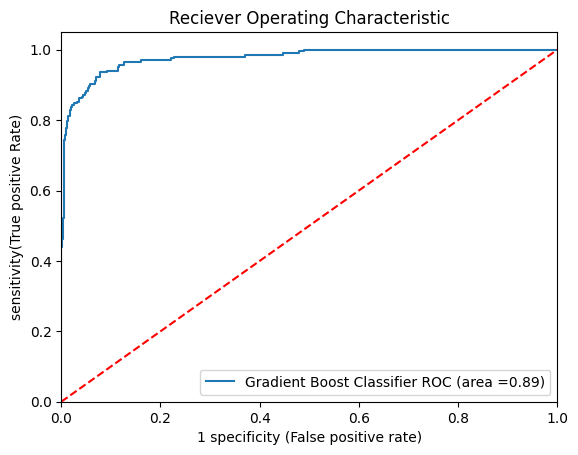

In [53]:
## plot the roc auc curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

## Add the model to the list that you want to view on the roc plot
auc_model = [
    {
        'label' : 'Gradient Boost Classifier',
        'model' : GradientBoostingClassifier(n_estimators=500,min_samples_split=20,max_depth=10,loss='log_loss',criterion='squared_error'),
        'auc' : 0.8852
    },
]

## create loop through all the models 
for algo in auc_model:
    model = algo['model']  ## selecting the model
    model.fit(X_train,y_train) ## training the data
    ## computing false positive rate and true positive rate
    fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    ## calculating the area under curve to display on the plot 
    plt.plot(fpr,tpr,label='%s ROC (area =%0.2f)'% (algo['label'],algo['auc']))
    ## custom setting for the plot 
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1 specificity (False positive rate)')
    plt.ylabel('sensitivity(True positive Rate)')
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()

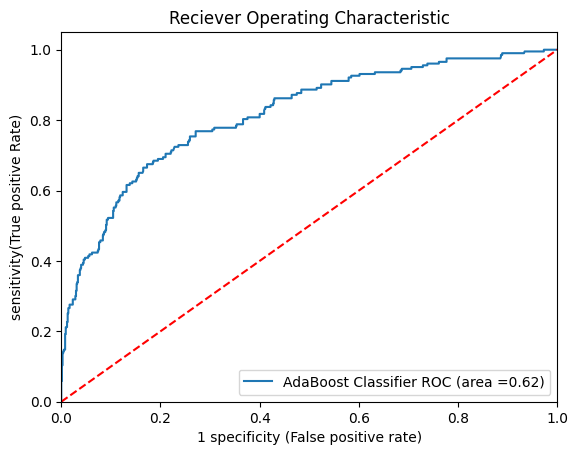

In [54]:
## plot the roc auc curve for adaboost
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

## Add the model to the list that you want to view on the roc plot
auc_model = [
    {
        'label' : 'AdaBoost Classifier',
        'model' : AdaBoostClassifier(n_estimators=150,learning_rate=1),
        'auc' : 0.6210
    },
]

## create loop through all the models 
for algo in auc_model:
    model = algo['model']  ## selecting the model
    model.fit(X_train,y_train) ## training the data
    ## computing false positive rate and true positive rate
    fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    ## calculating the area under curve to display on the plot 
    plt.plot(fpr,tpr,label='%s ROC (area =%0.2f)'% (algo['label'],algo['auc']))
    ## custom setting for the plot 
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1 specificity (False positive rate)')
    plt.ylabel('sensitivity(True positive Rate)')
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()